# 0906


## 합성곱 신경망 소개

합성곱 신경망(Convolutional Neural Networks, CNN)은 이미지나 비디오 등의 공간적 구조를 가진 데이터를 처리하는 데 유용한 딥러닝 모델

- 입력 레이어: 원시 이미지 데이터를 받아들이는 첫 번째 레이어. 이미지는 보통 높이, 너비, 그리고 색상 채널(예: RGB - 3, 흑백은 1)의 3차원 텐서로 표현.

- 합성곱 레이어(Convolutional Layer): 이 레이어는 이미지의 지역적 특성을 학습. 이 레이어에서는 "필터(3x3)" 또는 "커널"이라는 작은 윈도우가 이미지를 스캔하며 이동. 각 필터는 고유한 특징(예: 가장자리, 텍스처 등)을 인식.

- 필터/커널: 합성곱 층에서 사용되는 작은 행렬로, 랜덤한 값으로 초기화된 후에 데이터를 통해 학습. 필터는 이미지의 여러 부분을 스캔하며 특정 특징을 인식. 각 필터는 이미지의 다른 특성을 감지하는 역할을 한다. 예를 들어, 어떤 필터는 가로선을, 다른 필터는 세로선을, 또 다른 필터는 모서리나 특정 패턴을 감지할 수 있습니다. 여러 개의 필터를 사용함으로써, 다양한 특성을 추출하고 이미지를 더 잘 이해할 수 있다.

- 스트라이드: 필터가 이미지 위를 이동하는 간격. 스트라이드 값에 따라 출력 피쳐 맵의 크기가 결정되며 큰 스트라이드는 작은 출력 차원을 생성하고, 작은 스트라이드는 큰 출력 차원을 생성.

- 패딩: 입력 이미지의 주위에 픽셀을 추가하는 방법으로, 합성곱이 적용된 후의 출력 크기를 조절할 수 있다. 패딩이 없으면 합성곱 연산을 거치면서 출력 이미지의 크기가 작아진다(4x4가 2x2됨). 패딩을 사용하면 이를 방지하고 원본 이미지의 공간적 크기를 보존할 수 있다.

- 활성화 함수: 일반적으로 ReLU(Rectified Linear Unit) 같은 비선형 활성화 함수가 사용되어 복잡한 패턴을 학습할 수 있도록 한다. - 선형변환만 하면 비슷한 것만 학습됨

- 풀링 레이어(Pooling Layer): 이 레이어는 출력을 다운샘플링하여 모델의 복잡도를 줄이고, 과적합을 방지하며, 일부 공간적 인식력을 보존. 가장 많이 사용되는 풀링 방법은 최대 풀링(Max Pooling)이다. - 에버리지 풀링도 있음, 소실도 효율성은 좋아짐

- 완전 연결 레이어(Fully Connected Layer): 이 레이어는 모든 입력 뉴런이 모든 출력 뉴런과 연결되어 있다. 이는 일반적으로 신경망의 마지막 단계에서 사용되며, 합성곱 및 풀링 레이어를 통해 학습된 고차원 특징을 이용하여 최종적으로 분류나 회귀 등의 작업을 수행.- 분류는 소프트맥스, 시그모이드는 2진 분류

- 이러한 각 요소들이 어떻게 함께 작동하는지 간단하게 설명하면, 합성곱 레이어의 필터는 입력 이미지를 스캔하면서 지역적인 특징을 감지하고, 이 정보를 활성화 맵(특징 맵)의 형태로 출력. 이때, 스트라이드와 패딩은 필터가 이미지를 어떻게 스캔할지를 결정하며, 활성화 함수는 비선형성을 추가하여 복잡한 패턴을 학습하게 해준다. 그 다음, 풀링 레이어는 이 특징 맵을 `다운샘플링`하여 모델의 복잡도를 줄이고, 공간적 인식력을 보존하며, 과적합을 방지한다. 마지막으로, 완전 연결 레이어는 이런 모든 특징들을 종합하여 최종적으로 이미지의 클래스를 예측하거나, 객체의 위치를 회귀하는 등의 작업을 수행한다.
이런 식으로, CNN은 각 레이어에서 이미지의 다양한 특징을 학습하고, 이 정보를 바탕으로 복잡한 패턴을 인식하고, 효과적인 예측을 수행하게 됩니다.

- 2D 합성곱 (Conv2D): 이는 가장 흔히 사용되는 합성곱 유형으로, 이미지 같은 2차원 데이터에 적용. Conv2D는 입력 데이터의 지역적 특징을 인식하고 이를 학습하는 데 사용.

- 1D 합성곱 (Conv1D): 이 유형의 합성곱은 시퀀스 데이터(예: 시계열 데이터, 텍스트 데이터)를 처리하는 데 주로 사용. 이는 입력 시퀀스의 연속적인 부분을 고려하므로, 특히 시간적인 순서 정보가 중요한 문제에 유용. -행은 1 열은 여러개 - 즉 텍스트 같은 데이터 , 필터의 모양은 1x3 이런식으로 사용

https://kyeonminsu.tistory.com/30

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [2]:
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()

# 흑백 이미지이므로 channel은 1
# train_input은 원래(60000, 28, 28)의 shape를 가지고 있음 -> (60000, 28, 28, 1)로 reshape, 채널을 추가해줌
# 정규화를 위해 255로 나누어줌 -> 0~1사이의 값으로 정규화
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  # -1은 나머지 차원을 맞추고 남은 차원을 알아서 맞춰줌

# 학습, 검증 데이터 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
# 데이터 shape 확인 , train_scaled는 학습용
train_input.shape, train_scaled.shape, train_target.shape, val_scaled.shape, val_target.shape

((60000, 28, 28), (48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

### 합성곱 신경망(Convolutional Neural Networks, CNNs)에서 필터(또는 커널)를 여러 개 사용하는 이유

- 특성 추출: 각 필터는 이미지의 다른 특성을 감지하는 역할을 합니다. 예를 들어, 어떤 필터는 가로선을, 다른 필터는 세로선을, 또 다른 필터는 모서리나 특정 패턴을 감지할 수 있습니다. 여러 개의 필터를 사용함으로써, 다양한 특성을 추출하고 이미지를 더 잘 이해할 수 있습니다.

- 복잡한 패턴 학습: 초기 층의 필터가 간단한 특성을 추출하는 데 사용된다면, 네트워크의 깊은 층으로 갈수록 이러한 특성들이 결합되어 더 복잡한 패턴을 학습할 수 있습니다. 예를 들어, 얼굴 인식을 위한 CNN에서는 초기 층이 간단한 가장자리를 감지하는 반면, 더 깊은 층에서는 눈, 코, 입과 같은 특징을 학습하고, 최종적으로는 얼굴 전체의 복잡한 패턴을 인식할 수 있습니다.

- 증가된 모델의 용량: 여러 개의 필터를 사용함으로써, 모델은 더 많은 정보를 처리하고 저장할 수 있게 됩니다. 이는 모델이 더 복잡한 함수를 학습하고, 더 다양한 데이터에 대해 일반화할 수 있게 만듭니다.

- 다양한 해상도의 정보 포착: 다양한 크기의 필터를 사용하면, 다른 해상도에서의 특성을 포착할 수 있습니다. 작은 필터는 미세한 패턴을, 큰 필터는 이미지의 광범위한 구조를 감지할 수 있습니다. 이는 이미지의 다양한 측면을 이해하는 데 도움이 됩니다.

In [4]:
model = tf.keras.Sequential()

In [5]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

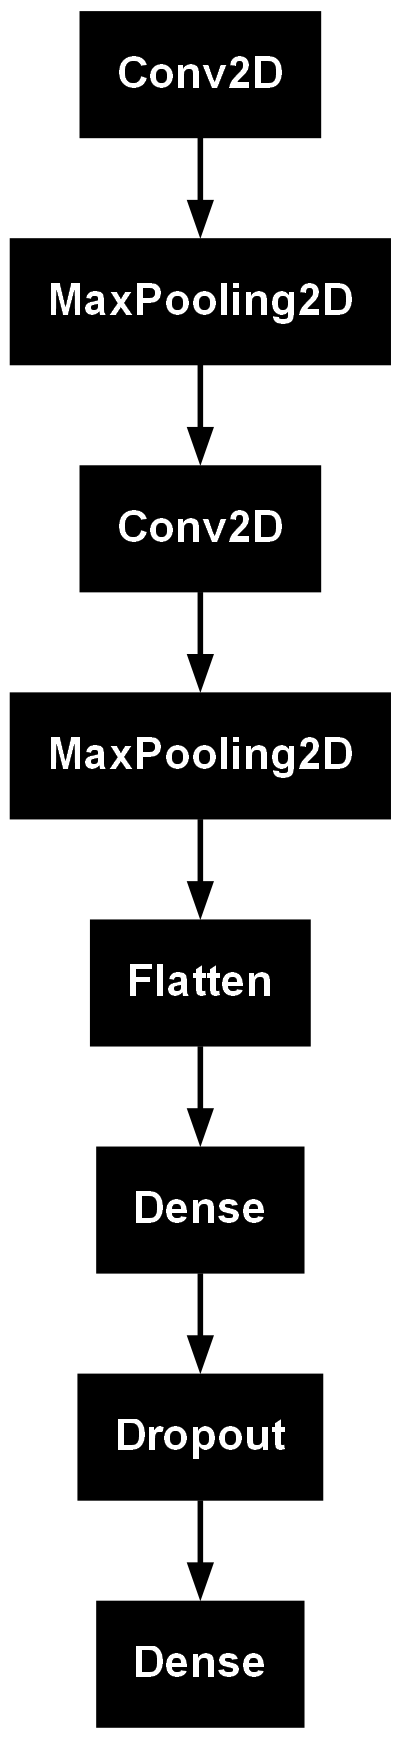

In [7]:
# 신경망 모델 구조 시각화
tf.keras.utils.plot_model(model)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    r"D:\pythonProject\VISION\datas\best-cnn-model.keras", save_best_only=True
)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7404 - loss: 0.7254 - val_accuracy: 0.8748 - val_loss: 0.3334
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8678 - loss: 0.3689 - val_accuracy: 0.8963 - val_loss: 0.2808
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8882 - loss: 0.3075 - val_accuracy: 0.9038 - val_loss: 0.2608
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8998 - loss: 0.2747 - val_accuracy: 0.9126 - val_loss: 0.2457
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9077 - loss: 0.2535 - val_accuracy: 0.9156 - val_loss: 0.2311
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9154 - loss: 0.2275 - val_accuracy: 0.9195 - val_loss: 0.2313
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9200 - loss: 0.2135 - val_accuracy: 0.9192 - val_loss: 0.2368


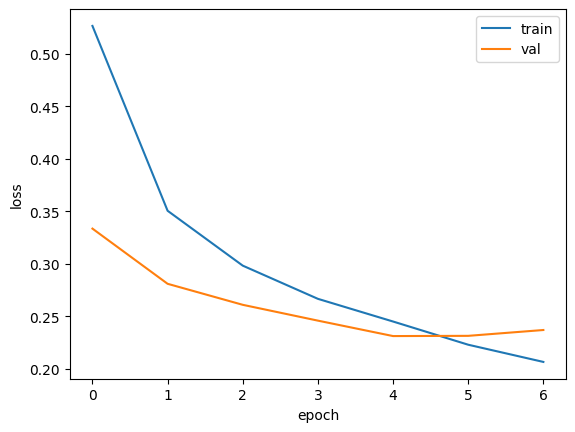

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [13]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9180 - loss: 0.2240


[0.23105205595493317, 0.9155833125114441]

In [14]:
# 20% 검증 데이터로 평가 1.2만개
val_scaled.shape

(12000, 28, 28, 1)

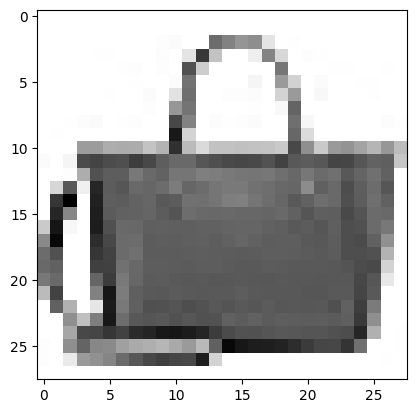

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
# 배열에서 첫 번째 요소(인덱스 0)를 선택하려면 [0]을 사용, 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어
# shape가 (1, 28, 28, 1)이 됨
# 여기서 중요한 점은 슬라이싱을 사용합으로써 반환된 데이터의 형태가 원본 배열의 부분집합을 유지한다는 것입니다
preds = model.predict(val_scaled[0:10])
print(preds[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[9.2080843e-14 5.8496012e-21 2.4122074e-16 4.0139922e-14 2.4609314e-14
 4.5290082e-13 1.7088954e-14 9.1831091e-14 1.0000000e+00 1.0410064e-15]


 1만 가방을 나타내는것, 나머지는 0에 가까운 값들이 나오게 됨 

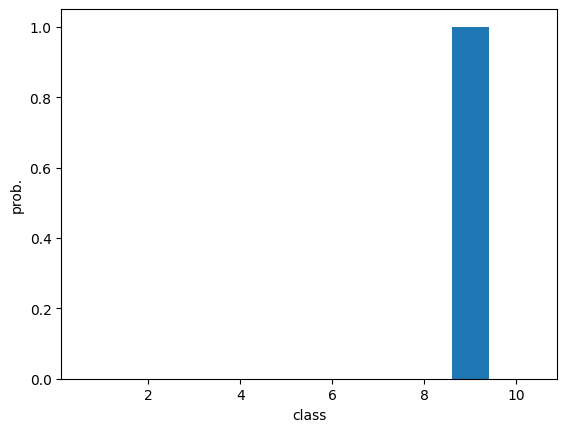

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

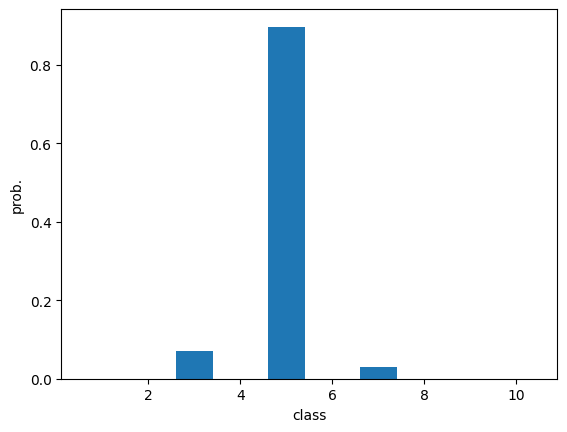

In [20]:
plt.bar(range(1, 11), preds[3])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\events.py:82: UserWarning:

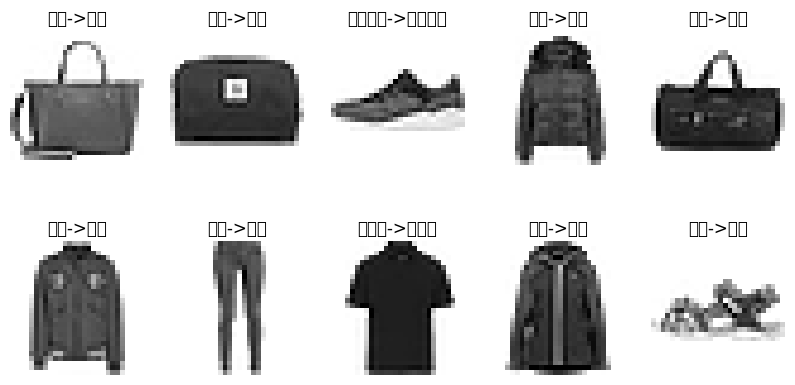

In [22]:
# pred 0부터 10까지  바 그래프로 출력
import numpy as np

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(val_scaled[i].reshape(28, 28), cmap='gray_r')
    plt.title(classes[val_target[i]] + '->' + classes[np.argmax(preds[i])])
    plt.axis('off')


d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\pythonProject\VISION\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  fig.canvas.

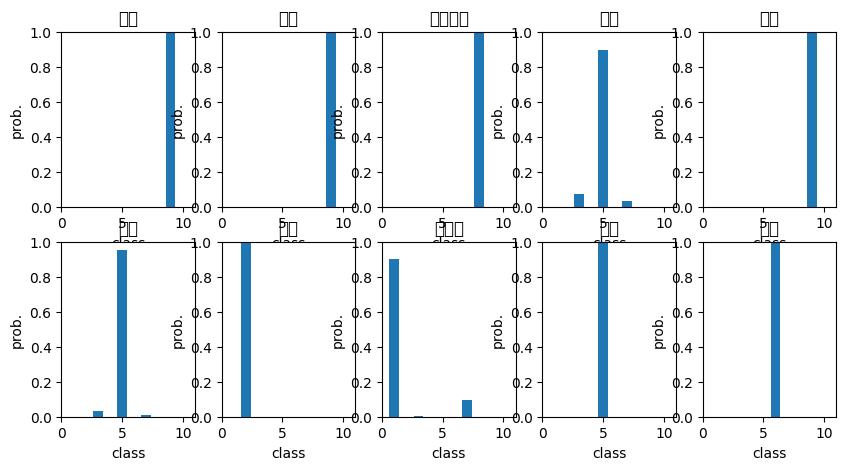

In [26]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.bar(range(1, 11), preds[i])
    plt.xlabel('class')
    plt.ylabel('prob.')
    plt.title(classes[val_target[i]])
    plt.axis([0, 11, 0, 1])
    
plt.show()


In [23]:
import numpy as np
print(classes[np.argmax(preds[0])])

가방


In [24]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [25]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9098 - loss: 0.2573


[0.25049176812171936, 0.9089999794960022]